# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# changed to 15 for tetsting
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 650
['vao', 'tubruq', 'jamestown', 'sonoita', 'grand-santi', 'itigi', 'avarua', 'tabiauea', 'souillac', 'calama', 'severo-kurilsk', 'pevek', 'puerto ayora', 'hilo', 'half moon bay', 'abeche', 'busselton', 'huilong', 'sainte-marie', 'mataura', 'longyearbyen', 'hermanus', 'kavieng', 'ewa beach', 'thompson', 'haines junction', 'atuona', 'kunashak', 'chokurdakh', 'carnarvon', 'tezu', 'hobart', 'nizwa', 'san jose', 'barentsburg', 'kapaa', 'ushuaia', 'san patricio', 'husavik', 'kysyl-syr', 'olga', 'fortuna', 'colares', 'conceicao do araguaia', 'nouadhibou', 'mega', 'barrow', 'illoqqortoormiut', 'neiafu', 'hami', 'tuy hoa', 'plettenberg bay', 'tuktoyaktuk', 'katherine', 'ananas', 'fayetteville', 'punta arenas', 'karamea', 'vestmannaeyjar', 'qaanaaq', 'nome', 'bambous virieux', 'vagur', 'rikitea', 'nanortalik', 'xichang', 'mys shmidta', 'umzimvubu', 'victoria', 'codrington', 'khatanga', 'bluff', 'grindavik', 'matara', 'mahebourg', 'wewak', 'pisco', 'bubaque', 'bou

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" 
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        city_weather = requests.get(city_url + city).json()
        
        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE
        city_date = city_weather["dt"]# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        #Append the City information into city_data list
        #cities_2_df = pd.DataFrame(cities_2)
        #cities_2_df.append({"City": city,
             #            "Lat": city_lat, 
              #           "Lng": city_lng, 
               #          "Max Temp": city_max_temp,
                #         "Humidity": city_humidity,
                 #        "Cloudiness": city_clouds,
                  #       "Wind Speed": city_wind,
                   #      "Country": city_country,
                    #     "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Test the core elements 
# Indicate that Data Loading is complete 


print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vao
Processing Record 2 of Set 1 | tubruq
City not found. Skipping...
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | sonoita
Processing Record 5 of Set 1 | grand-santi
Processing Record 6 of Set 1 | itigi
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 9 of Set 1 | souillac
Processing Record 10 of Set 1 | calama
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | half moon bay
Processing Record 16 of Set 1 | abeche
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | huilong
Processing Record 19 of Set 1 | sainte-marie
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 

Processing Record 38 of Set 4 | locri
Processing Record 39 of Set 4 | turukhansk
Processing Record 40 of Set 4 | ishim
Processing Record 41 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 4 | tara
Processing Record 43 of Set 4 | cockburn harbour
City not found. Skipping...
Processing Record 44 of Set 4 | mount darwin
Processing Record 45 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 46 of Set 4 | ust-nera
Processing Record 47 of Set 4 | cairns
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | pasighat
Processing Record 0 of Set 5 | cootamundra
Processing Record 1 of Set 5 | caconda
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | hede
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | iquitos
Processing Record 6 of Set 5 | ndele
Processing Record 7 of Set 5 | gladstone
Processing Record 8 of Set 5 | guerrero negro
Processing Record 9 of Set 5 | clyde river
Processing Reco

Processing Record 26 of Set 8 | svetlogorsk
Processing Record 27 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 28 of Set 8 | xuddur
Processing Record 29 of Set 8 | khandbari
Processing Record 30 of Set 8 | san cristobal
Processing Record 31 of Set 8 | tuatapere
Processing Record 32 of Set 8 | heiligenhafen
Processing Record 33 of Set 8 | lasa
Processing Record 34 of Set 8 | kaduna
Processing Record 35 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 8 | kokopo
Processing Record 37 of Set 8 | umea
Processing Record 38 of Set 8 | chuy
Processing Record 39 of Set 8 | beloha
Processing Record 40 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 8 | auki
Processing Record 42 of Set 8 | tchaourou
Processing Record 43 of Set 8 | port lincoln
Processing Record 44 of Set 8 | tambura
Processing Record 45 of Set 8 | ancud
Processing Record 46 of Set 8 | acin
City not found. Skipping...
Processing Record 47 of Set

City not found. Skipping...
Processing Record 15 of Set 12 | derzhavinsk
Processing Record 16 of Set 12 | sioux lookout
Processing Record 17 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 18 of Set 12 | carmaux
Processing Record 19 of Set 12 | saint-louis
Processing Record 20 of Set 12 | goulburn
Processing Record 21 of Set 12 | atlantic city
Processing Record 22 of Set 12 | krasnoselkup
Processing Record 23 of Set 12 | miranda
Processing Record 24 of Set 12 | yeppoon
Processing Record 25 of Set 12 | kimi
City not found. Skipping...
Processing Record 26 of Set 12 | lingao
Processing Record 27 of Set 12 | rodney
Processing Record 28 of Set 12 | takaka
Processing Record 29 of Set 12 | polgar
Processing Record 30 of Set 12 | nelson bay
Processing Record 31 of Set 12 | fairbanks
Processing Record 32 of Set 12 | nago
Processing Record 33 of Set 12 | hrubieszow
Processing Record 34 of Set 12 | kruisfontein
Processing Record 35 of Set 12 | zemio
Processing Record 36 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()


City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [6]:
# Display sample data
#city_data_df.head()


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vao,-22.6667,167.4833,79.29,87,87,20.13,NC,1675543374
1,jamestown,42.0970,-79.2353,26.02,28,48,7.00,US,1675543659
2,sonoita,31.8500,-112.8333,70.90,19,0,3.65,MX,1675543590
3,grand-santi,4.2500,-54.3833,73.92,98,94,5.48,GF,1675543660
4,itigi,-5.7000,34.4833,61.41,95,96,0.45,TZ,1675543661


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

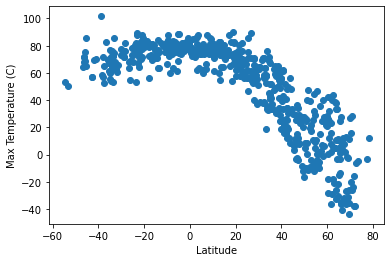

In [10]:
# Build scatter plot for latitude vs. temperature
x_values= city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

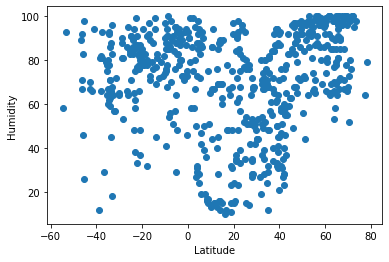

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

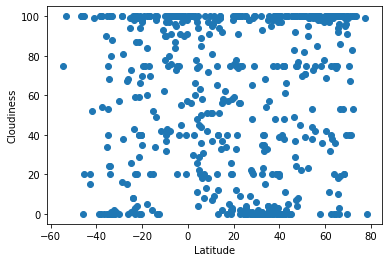

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

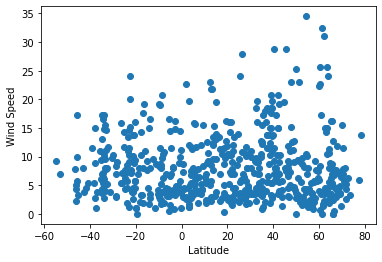

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.xlabel('Latitude')
#plt.ylabel(l)
#plt.title(title)


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,26.02,28,48,7.00,US,1675543659
2,sonoita,31.8500,-112.8333,70.90,19,0,3.65,MX,1675543590
3,grand-santi,4.2500,-54.3833,73.92,98,94,5.48,GF,1675543660
8,severo-kurilsk,50.6789,156.1250,25.95,73,100,6.22,RU,1675543663
9,pevek,69.7008,170.3133,-35.66,100,91,1.41,RU,1675543663


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vao,-22.6667,167.4833,79.29,87,87,20.13,NC,1675543374
4,itigi,-5.7000,34.4833,61.41,95,96,0.45,TZ,1675543661
5,avarua,-21.2078,-159.7750,82.45,78,40,13.80,CK,1675543661
6,souillac,-20.5167,57.5167,79.18,83,40,5.75,MU,1675543477
7,calama,-22.4667,-68.9333,73.89,33,20,24.16,CL,1675543662


###  Temperature vs. Latitude Linear Regression Plot

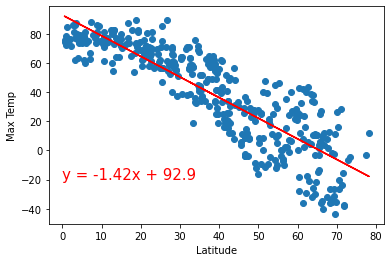

R squared: 0.7561600990296771


In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"R squared: {rvalue**2}")

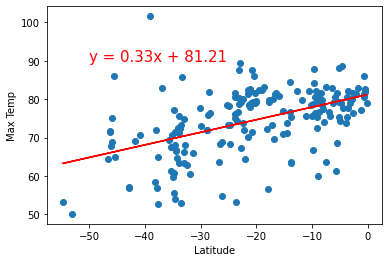

R squared: 0.24430548703709098


In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"R squared: {rvalue**2}")

Linear relationship between temperature and latitude. Therre is a strong positive correlation (r=0.76) in the Northern Hemisphere between increase in latitude and temperature. There is a weak positive correlation (r=0.24) between increase in latitude and increase in temperature. This may indicate that positive latitudes (northern hempisphere) have a greater influence on temperature than in the sourthern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

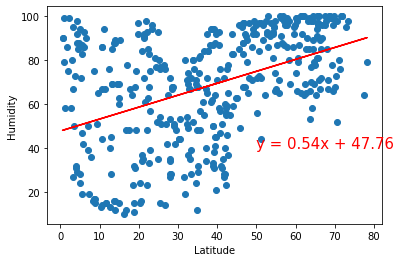

R squared: 0.1908607019534948


In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R squared: {rvalue**2}")

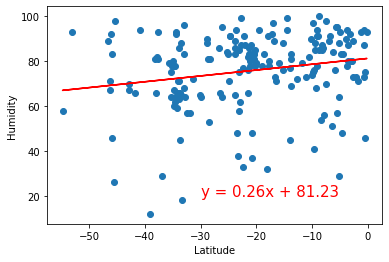

R squared: 0.04050805587607751


In [27]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R squared: {rvalue**2}")

Linear relationship between humidity and latitude. There is a very weak (nh = 0.19, sh = 0.04) or no correlation between humidity and latitude in either hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

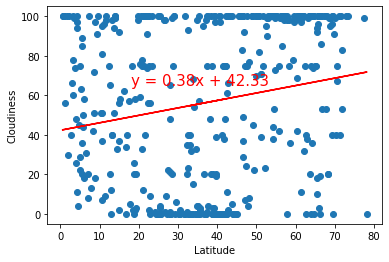

R squared: 0.03689582745910227


In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(18,65),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.show()
print(f"R squared: {rvalue**2}")

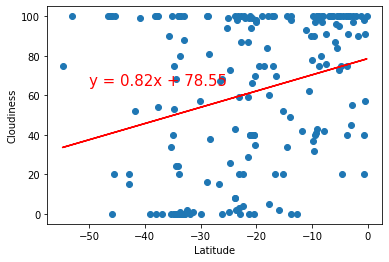

R squared: 0.0773608741633204


In [29]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"R squared: {rvalue**2}")

Linear relationship between cloudiness and latitude. There is no correlation (nh = 0.04, sh = 0.08) between humidity and latitude in either hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

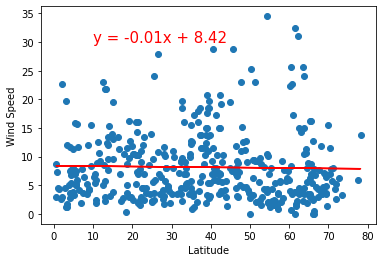

R squared: 0.0005221649782077616


In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"R squared: {rvalue**2}")

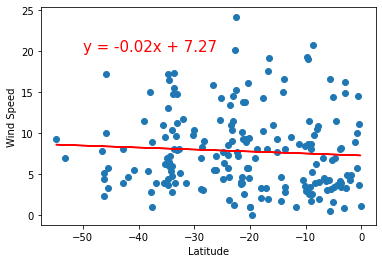

R squared: 0.004211432938668895


In [33]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"R squared: {rvalue**2}")

Linear relationship between cloudiness and latitude. There is no correlation (nh = 0.00, sh = 0.00) between winds speed and latitude in either hemisphere. 